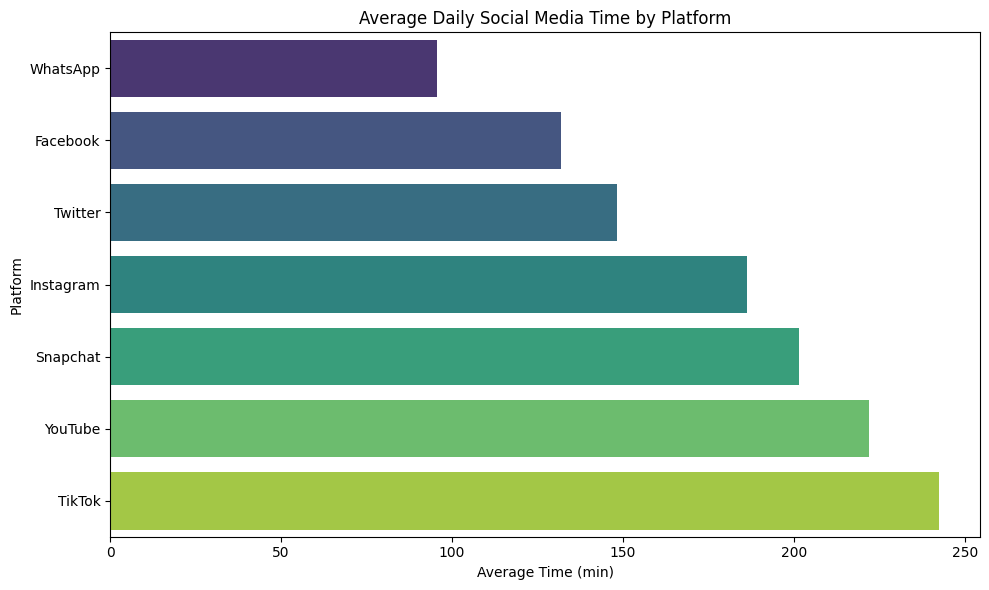

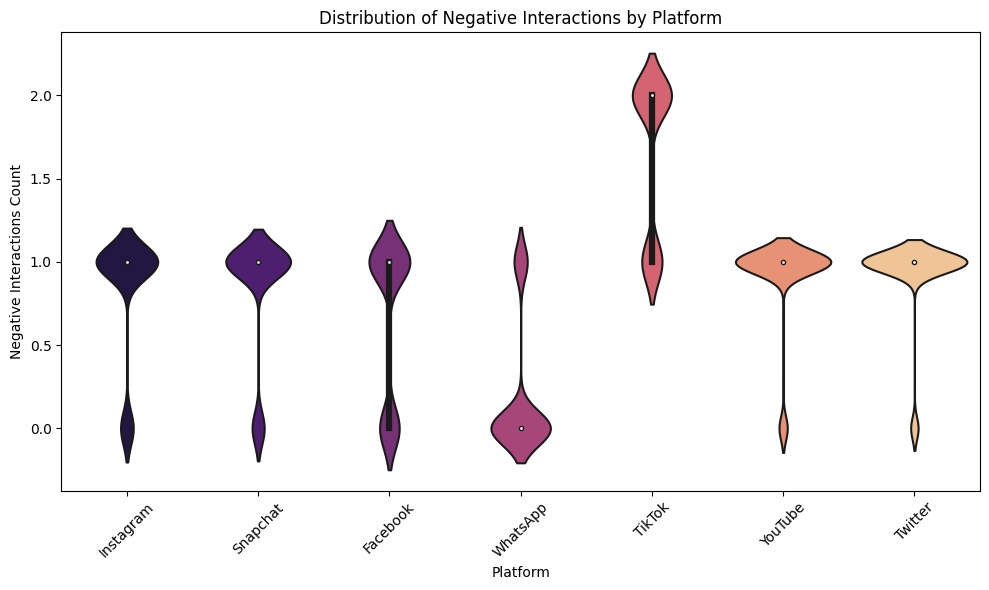

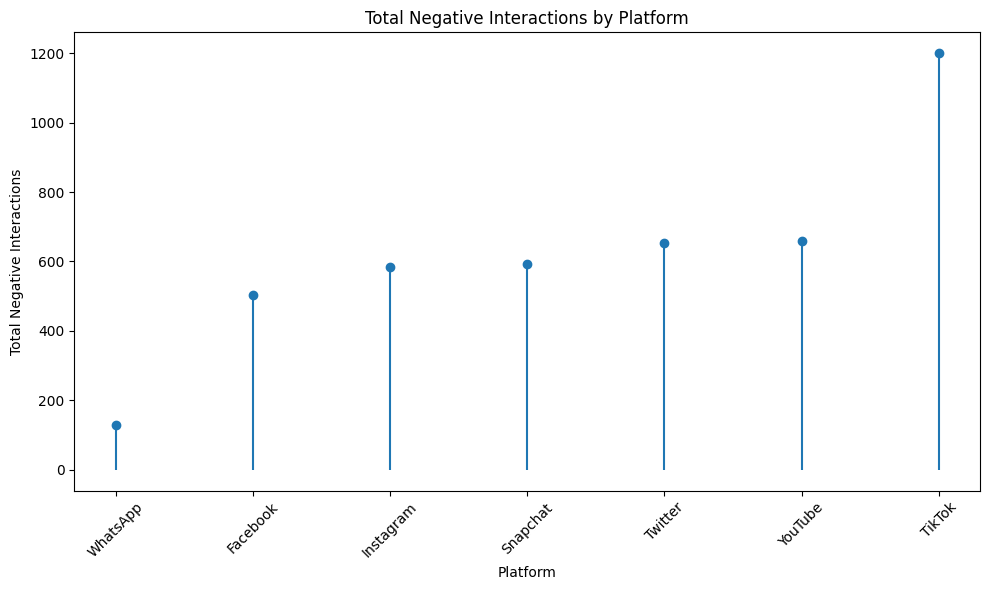

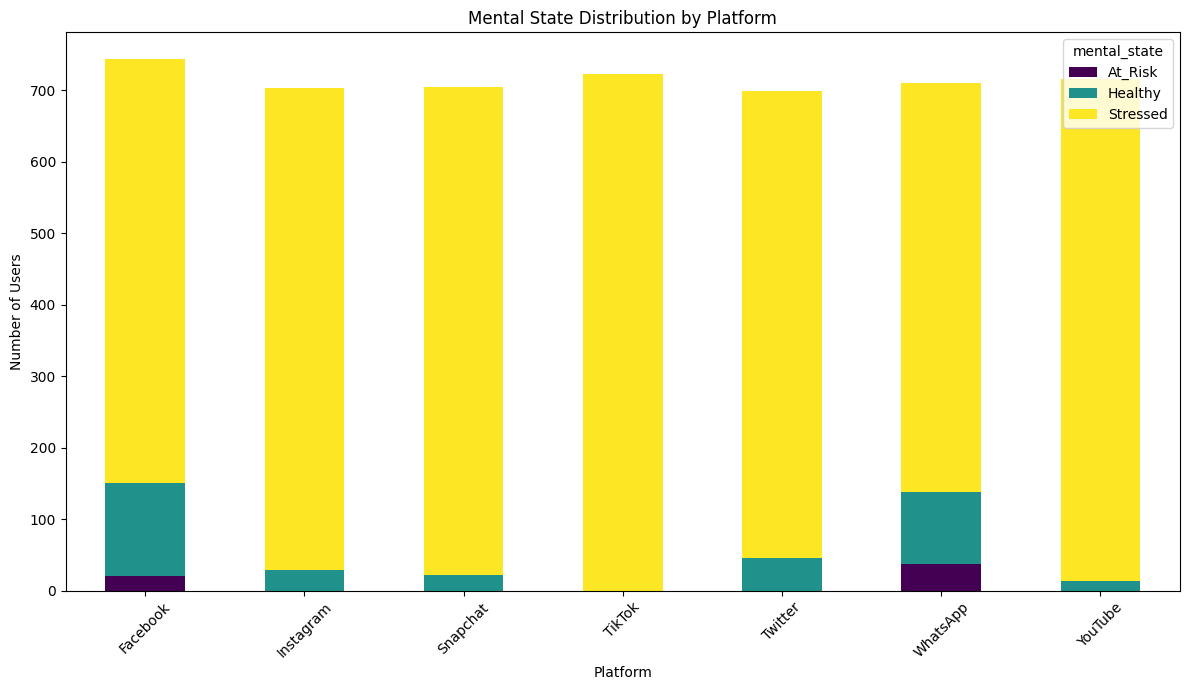

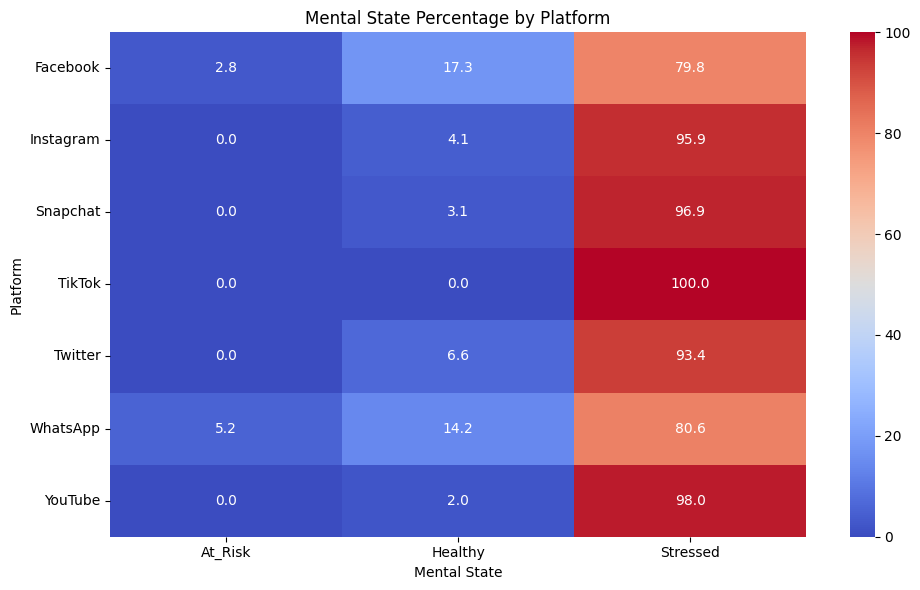

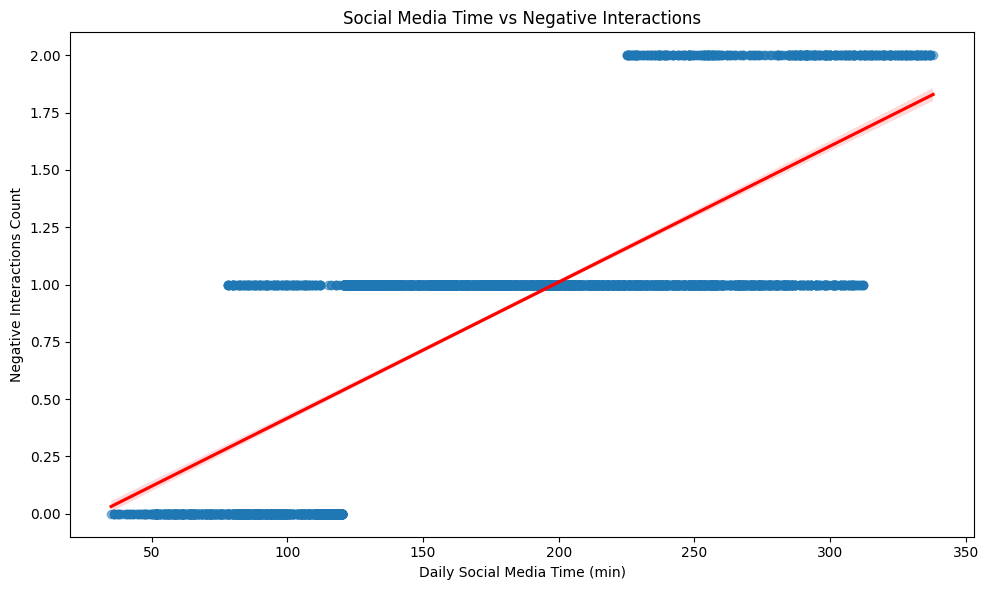

In [1]:
# 1. Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("Digital_platforms_and_user_behaviors", exist_ok=True)

# 2. Load Dataset

df = pd.read_csv("/kaggle/input/mental-health-social-media-correct/mental_health_social_media_correct.csv")

# 3. Visualization 1:
#    Average Social Media Time by Platform (Horizontal Bar Chart)

platform_time = df.groupby('platform')['social_media_time_min'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=platform_time.sort_values('social_media_time_min'),
    y='platform',
    x='social_media_time_min',
    palette='viridis'
)

plt.title("Average Daily Social Media Time by Platform")
plt.xlabel("Average Time (min)")
plt.ylabel("Platform")
plt.tight_layout()
plt.savefig("Digital_platforms_and_user_behaviors/platform_avg_time_horizontal.png", dpi=300, bbox_inches='tight')
plt.show()

# 4. Visualization 2 :
#    Negative Interactions by Platform (Violin Plot)

plt.figure(figsize=(10,6))
sns.violinplot(
    data=df,
    x='platform',
    y='negative_interactions_count',
    palette='magma'
)

plt.title("Distribution of Negative Interactions by Platform")
plt.xlabel("Platform")
plt.ylabel("Negative Interactions Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Digital_platforms_and_user_behaviors/platform_negative_interactions_violin.png", dpi=300, bbox_inches='tight')
plt.show()

# 5. Visualization 3:
#    Total Negative Interactions (Lollipop Chart)

total_neg = df.groupby('platform')['negative_interactions_count'].sum().reset_index()
total_neg = total_neg.sort_values('negative_interactions_count')

plt.figure(figsize=(10,6))
plt.stem(total_neg['platform'], total_neg['negative_interactions_count'], basefmt=" ")
plt.title("Total Negative Interactions by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Negative Interactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Digital_platforms_and_user_behaviors/platform_total_negative_interactions_lollipop.png", dpi=300, bbox_inches='tight')
plt.show()

# 6. Visualization 4:
#    Mental State Distribution by Platform (Stacked Bar Chart)

mental_dist = df.groupby(['platform', 'mental_state']).size().reset_index(name='count')
pivot = mental_dist.pivot(index='platform', columns='mental_state', values='count').fillna(0)

pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    colormap='viridis'
)

plt.title("Mental State Distribution by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Digital_platforms_and_user_behaviors/platform_mental_state_distribution_stacked.png", dpi=300, bbox_inches='tight')
plt.show()

# 7. Visualization 5 :
#    Mental State Percentage by Platform (Heatmap)

percentage = pivot.div(pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,6))
sns.heatmap(
    percentage,
    annot=True,
    cmap='coolwarm',
    fmt=".1f"
)

plt.title("Mental State Percentage by Platform")
plt.xlabel("Mental State")
plt.ylabel("Platform")
plt.tight_layout()
plt.savefig("Digital_platforms_and_user_behaviors/platform_mental_state_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

# 8. Visualization 6:
#    Social Media Time vs Negative Interactions (Scatter + Trendline)

plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x='social_media_time_min',
    y='negative_interactions_count',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)

plt.title("Social Media Time vs Negative Interactions")
plt.xlabel("Daily Social Media Time (min)")
plt.ylabel("Negative Interactions Count")
plt.tight_layout()
plt.savefig("Digital_platforms_and_user_behaviors/platform_time_vs_negative_interactions_regression.png", dpi=300, bbox_inches='tight')
plt.show()